# step 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("P556.xlsx")
print(df.head())

                                     title  rating  \
0                         Horrible product       1   
1  Camera quality is not like 48 megapixel       3   
2                                  Overall       4   
3                         A big no from me       1   
4            Put your money somewhere else       1   

                                                body  
0  Very disappointed with the overall performance...  
1                              Camera quality is low  
2  Got the mobile on the launch date,Battery must...  
3  1. It doesn't work with 5.0GHz WiFi frequency....  
4  Not worth buying....faulty software, poor disp...  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1440 non-null   object
 1   rating  1440 non-null   int64 
 2   body    1440 non-null   object
dtypes: int64(1), object(2)
memory usage: 33.9+ KB


In [4]:
df.describe()

,rating
count,1440.000000
mean,3.173611
std,1.584453
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


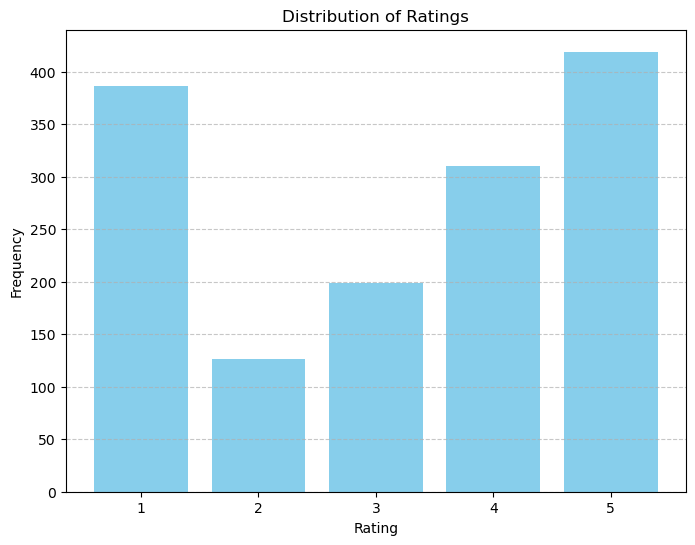

In [5]:
rating_counts = df['rating'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.bar(rating_counts.index, rating_counts.values, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.xticks(rating_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
def get_sentiment(rating):
  if rating >= 4:
    return 'positive'
  elif rating == 3:
    return 'neutral'
  else:
    return 'negative'

df['sentiment'] = df['rating'].apply(get_sentiment)

print("Sentiment distribution:")
print(df['sentiment'].value_counts())

Sentiment distribution:
positive    729
negative    512
neutral     199
Name: sentiment, dtype: int64


In [7]:
print(df['sentiment'].head())
print(df['sentiment'].dtype)
print(df['sentiment'].isna().sum())

0    negative
1     neutral
2    positive
3    negative
4    negative
Name: sentiment, dtype: object
object
0


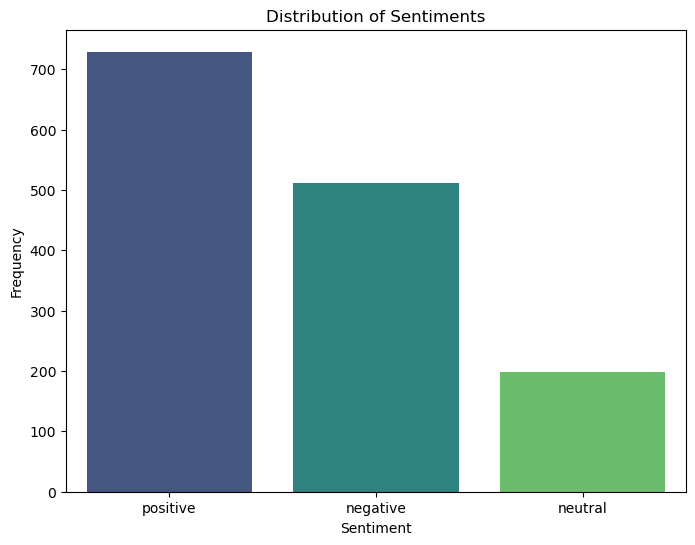

In [8]:
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiments')
plt.show()


Descriptive statistics for body length:
count    1440.000000
mean      302.109028
std       225.733052
min         4.000000
25%       170.000000
50%       246.000000
75%       359.000000
max      2490.000000
Name: body_length, dtype: float64


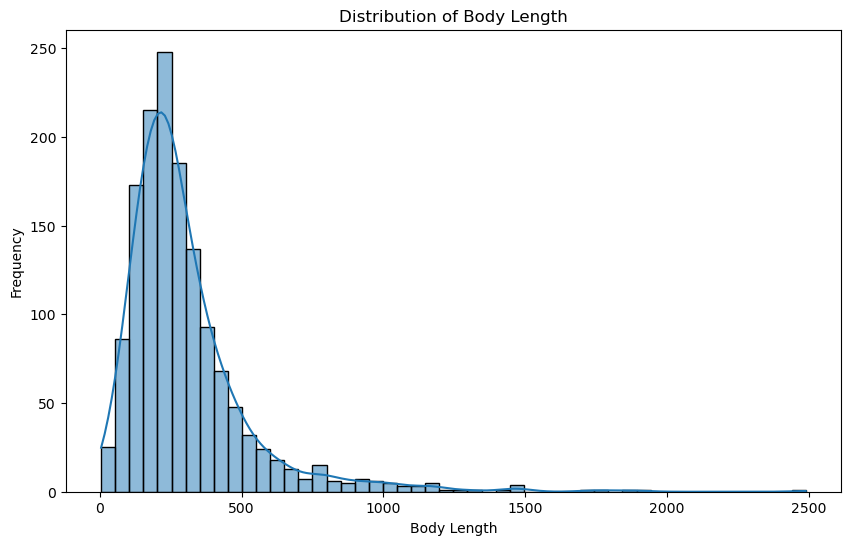

In [9]:
# Calculate the length of the text in the 'body' column
df['body_length'] = df['body'].apply(len)

# Print descriptive statistics of the 'body_length' column
print("\nDescriptive statistics for body length:")
print(df['body_length'].describe())

# Plot a histogram of the 'body_length'
plt.figure(figsize=(10, 6))
sns.histplot(df['body_length'], bins=50, kde=True)
plt.xlabel('Body Length')
plt.ylabel('Frequency')
plt.title('Distribution of Body Length')
plt.show()

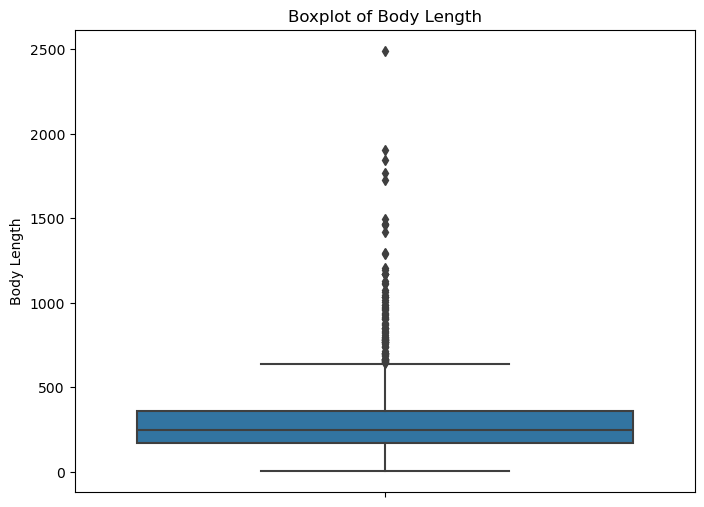

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['body_length'])
plt.ylabel('Body Length')
plt.title('Boxplot of Body Length')
plt.show()

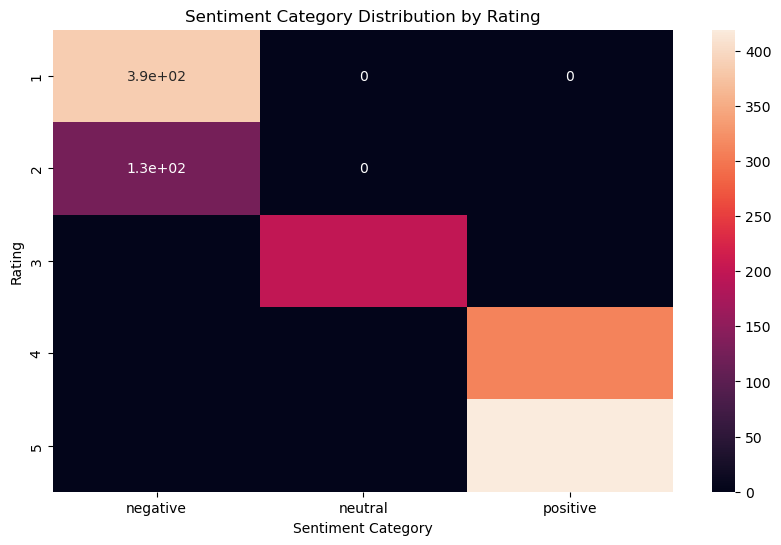

In [11]:
# Create pivot table directly from categorical sentiment
heatmap_data = df.pivot_table(index='rating', columns='sentiment', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True)
plt.title('Sentiment Category Distribution by Rating')
plt.ylabel('Rating')
plt.xlabel('Sentiment Category')
plt.show()


<Axes: ylabel='sentiment'>

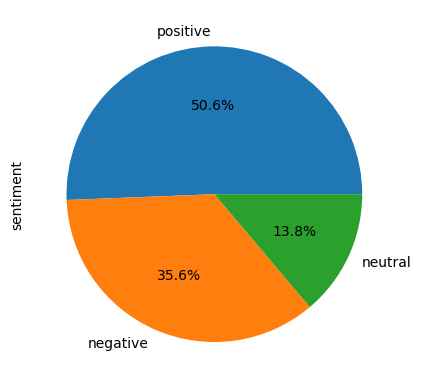

In [12]:
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%')

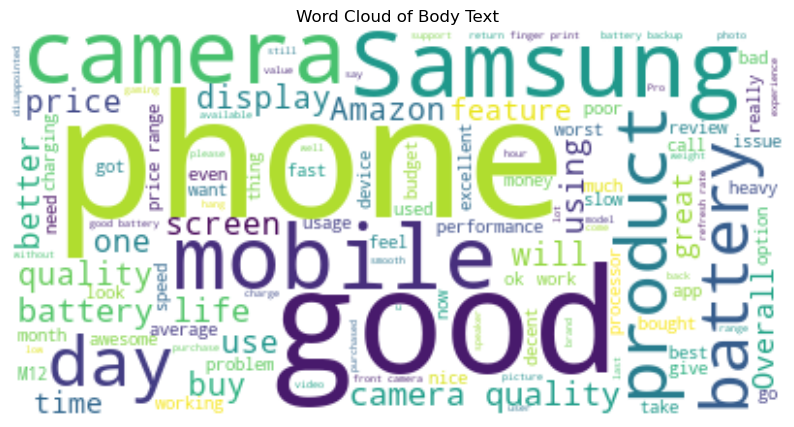

In [13]:
!pip install wordcloud -q

from wordcloud import WordCloud

# Check if 'body' column exists
if 'body' in df.columns:
    # Combine all text in the 'body' column into a single string
    text = " ".join(review for review in df['body'].astype(str))

    # Create and generate a word cloud image:
    wordcloud = WordCloud(background_color="white").generate(text)

    # Display the generated image:
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Word Cloud of Body Text')
    plt.show()
else:
    print("Error: 'body' column not found in the DataFrame.")

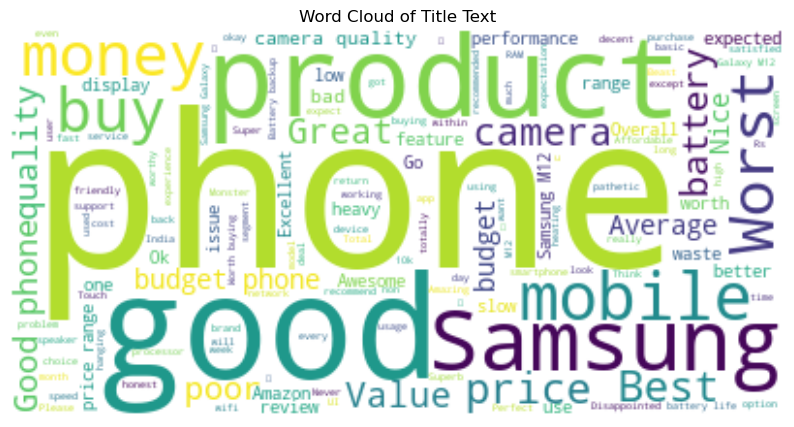

In [14]:
# Check if 'title' column exists
if 'title' in df.columns:
    # Combine all text in the 'title' column into a single string
    text_title = " ".join(title for title in df['title'].astype(str))

    # Create and generate a word cloud image for titles:
    wordcloud_title = WordCloud(background_color="white").generate(text_title)

    # Display the generated image:
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud_title, interpolation='bilinear')
    plt.axis("off")
    plt.title('Word Cloud of Title Text')
    plt.show()
else:
    print("Error: 'title' column not found in the DataFrame.")

# step 2

In [15]:
!pip install demoji -q
import demoji

demoji.download_codes()

# Define the set of sentiment emojis
sentiment_emojis = set([
    '😊', '😂', '😍', '👍', '🎉', '❤️', '💯', '😁', '🙌', '✨', # Positive
    '😢', '😭', '😠', '👎', '💔', '😞', '😔', '😩', '😤', '😡', # Negative
    '😐', '😑', '😶', '😬', # Neutral
    '🙄', '😏', '🤔', '🤨', '🙃', '😈', '😕', '😌', '😮‍💨', '😒', '😲', '😳' #Sarcastic
    '🤯', '😱', '🔥', '💥', '🥵', '🥶', '🧨', '💣', '🌟', '🧡'# Intensifier
    '🤡', '💅', ',🐐', ',💀', '🍑','🍆', '👀', '🧠', '🧃', '🧢', '🧍', '🧏', '🧤', '🧻'#Dual-Meaning
])

def process_emojis(text):
    if not isinstance(text, str):
        return text  # Return non-string inputs as they are

    # Find all emojis in the text
    found_emojis = demoji.findall(text)

    processed_text = text
    for emoji, description in found_emojis.items():
        # If the emoji is NOT in our sentiment set, remove it
        if emoji not in sentiment_emojis:
            processed_text = processed_text.replace(emoji, '')
        # If the emoji IS in our sentiment set, demojize it
        else:
            processed_text = processed_text.replace(emoji, f' {description} ') # Add spaces around description for better separation

    # Remove extra spaces created by replacements
    processed_text = ' '.join(processed_text.split())
    return processed_text

df['body'] = df['body'].apply(process_emojis)
df['title'] = df['title'].apply(process_emojis)
print(df[['body', 'title']].head())

                                                body  \
0  Very disappointed with the overall performance...   
1                              Camera quality is low   
2  Got the mobile on the launch date,Battery must...   
3  1. It doesn't work with 5.0GHz WiFi frequency....   
4  Not worth buying....faulty software, poor disp...   

                                     title  
0                         Horrible product  
1  Camera quality is not like 48 megapixel  
2                                  Overall  
3                         A big no from me  
4            Put your money somewhere else  


In [16]:
!pip install contractions -q
import contractions
def fix_contractions(text):
    if isinstance(text, str):
        return contractions.fix(text)
    return text

df['body'] = df['body'].apply(fix_contractions)
df['title'] = df['title'].apply(fix_contractions)
print(df[['body', 'title']].head())

                                                body  \
0  Very disappointed with the overall performance...   
1                              Camera quality is low   
2  Got the mobile on the launch date,Battery must...   
3  1. It does not work with 5.0GHz WiFi frequency...   
4  Not worth buying....faulty software, poor disp...   

                                     title  
0                         Horrible product  
1  Camera quality is not like 48 megapixel  
2                                  Overall  
3                         A big no from me  
4            Put your money somewhere else  


In [17]:
df['combined_text'] = df['title'].fillna('') + ' ' + df['body'].fillna('')
print(df[['title', 'body', 'combined_text']].head())

                                     title  \
0                         Horrible product   
1  Camera quality is not like 48 megapixel   
2                                  Overall   
3                         A big no from me   
4            Put your money somewhere else   

                                                body  \
0  Very disappointed with the overall performance...   
1                              Camera quality is low   
2  Got the mobile on the launch date,Battery must...   
3  1. It does not work with 5.0GHz WiFi frequency...   
4  Not worth buying....faulty software, poor disp...   

                                       combined_text  
0  Horrible product Very disappointed with the ov...  
1  Camera quality is not like 48 megapixel Camera...  
2  Overall Got the mobile on the launch date,Batt...  
3  A big no from me 1. It does not work with 5.0G...  
4  Put your money somewhere else Not worth buying...  


In [18]:
!pip install langdetect -q
from langdetect import detect

# Detect language per row
df['language'] = df['combined_text'].apply(detect)

# View language distribution
print(df['language'].value_counts())

en    1414
hi      11
id       4
ca       3
af       2
ml       1
et       1
de       1
so       1
no       1
fr       1
Name: language, dtype: int64


In [19]:
!pip install googletrans==4.0.0-rc1 -q
from googletrans import Translator

translator = Translator()

def translate_to_english(text):
    if isinstance(text, str) and len(text) > 0:
        try:
            return translator.translate(text, dest='en').text
            # else:
            #     return text
        except Exception as e:
            print(f"Translation error: {e} for text: {text}")
            return text # Return original text if translation fails
    return text # Return non-string or empty inputs as they are

# Apply the translation function to the 'body' column where language is not 'en'
df['body_translated'] = df.apply(lambda row: translate_to_english(row['combined_text']) if row['language'] != 'en' else row['combined_text'], axis=1)

print("\nHead of translated body column:")
print(df['body_translated'].head())


Head of translated body column:
0    Horrible product Very disappointed with the ov...
1    Camera quality is not like 48 megapixel Camera...
2    Overall Got the mobile on the launch date,Batt...
3    A big no from me 1. It does not work with 5.0G...
4    Put your money somewhere else Not worth buying...
Name: body_translated, dtype: object


In [20]:
# Detect language per row
df['body_translated_language'] = df['body_translated'].apply(detect)

# View language distribution
print(df['body_translated_language'].value_counts())

en    1430
id       3
af       2
ca       2
de       1
no       1
fr       1
Name: body_translated_language, dtype: int64


In [21]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tharun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tharun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tharun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
import os
nltk_data_path = os.path.join(os.getcwd(), 'nltk_data')
nltk.data.path.append(nltk_data_path)
nltk.download('punkt', download_dir=nltk_data_path)
nltk.download('punkt_tab', download_dir=nltk_data_path)

[nltk_data] Downloading package punkt to C:\Users\Tharun\Sentiment
[nltk_data]     analysis\project\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Tharun\Sentiment
[nltk_data]     analysis\project\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [23]:
def clean_text(text):
  if isinstance(text, str):
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text, flags=re.MULTILINE)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove bullets
    text = re.sub(r'(?<!\d)\b\d+\.(?!\d)', '', text)
    # Remove mentions (@) and hashtags (#)
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove punctuation except ?, !, ..., ", ', -, --
    text = re.sub(r'[^\w\s?!.\-"]', '', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text.lower() # Convert to lowercase
  return text

df['body_cleaned'] = df['body_translated'].apply(clean_text)
print(df[['body_translated', 'body_cleaned']].head())

                                     body_translated  \
0  Horrible product Very disappointed with the ov...   
1  Camera quality is not like 48 megapixel Camera...   
2  Overall Got the mobile on the launch date,Batt...   
3  A big no from me 1. It does not work with 5.0G...   
4  Put your money somewhere else Not worth buying...   

                                        body_cleaned  
0  horrible product very disappointed with the ov...  
1  camera quality is not like 48 megapixel camera...  
2  overall got the mobile on the launch datebatte...  
3  a big no from me it does not work with 5.0ghz ...  
4  put your money somewhere else not worth buying...  


In [24]:
nltk.download('averaged_perceptron_tagger', quiet=True)

# Define list of negative words
negative_words = set([
    "not", "no", "never", "none", "nobody", "nothing", "nowhere",
    "hardly", "scarcely", "barely", "cannot", "can't", "don't", "doesn't", "didn't",
    "won't", "wouldn't", "shouldn't", "couldn't", "isn't", "aren't", "wasn't", "weren't",
    "hasn't", "haven't", "hadn't", "fail", "failed", "failing", "miss", "missed",
    "without", "deny", "denied", "refuse", "refused", "reject", "rejected",
    "avoid", "avoided", "stop", "stopped", "block", "blocked", "cancel", "canceled",
    "end", "ended", "terminate", "terminated", "abandon", "abandoned", "withdraw",
    "withdrew", "destroy", "destroyed", "ruin", "ruined", "damage", "damaged",
    "hurt", "hurting", "hate", "hated", "dislike", "disliked", "ignore", "ignored",
    "neglect", "neglected", "lose", "lost", "delay", "delayed", "postpone", "postponed",
    "problem", "issue", "error", "wrong", "bad", "worse", "worst", "poor", "fail"
])

# Get the set of standard English stop words
stop_words = set(stopwords.words('english'))

# Create a lemmatizer instance
lemmatizer = WordNetLemmatizer()

# Function to perform tokenization, stop word removal (excluding negative words), and lemmatization
def preprocess_text(text):
  if isinstance(text, str):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words, but keep negative words
    filtered_tokens = [word for word in tokens if word not in stop_words or word in negative_words]
    # Lemmatize the filtered tokens
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    return " ".join(lemmatized_tokens)
  return text # Return non-string inputs as they are

# Apply the preprocessing function to the cleaned body text
df['body_processed'] = df['body_cleaned'].apply(preprocess_text)

print("\nHead of processed body column:")
print(df[['body_cleaned', 'body_processed']].head())


Head of processed body column:
                                        body_cleaned  \
0  horrible product very disappointed with the ov...   
1  camera quality is not like 48 megapixel camera...   
2  overall got the mobile on the launch datebatte...   
3  a big no from me it does not work with 5.0ghz ...   
4  put your money somewhere else not worth buying...   

                                      body_processed  
0  horrible product disappointed overall performa...  
1  camera quality not like 48 megapixel camera qu...  
2  overall got mobile launch datebattery must app...  
3  big no not work 5.0ghz wifi frequency . 2.4ghz...  
4  put money somewhere else not worth buying .......  


model 1 on traditional model selecting one mobel from all which is performing well

Logistic Regression Model Performance:
Accuracy: 0.8125

Classification Report:
               precision    recall  f1-score   support

    negative       0.89      0.86      0.88       111
     neutral       0.49      0.43      0.46        44
    positive       0.84      0.89      0.87       133

    accuracy                           0.81       288
   macro avg       0.74      0.73      0.73       288
weighted avg       0.81      0.81      0.81       288


Confusion Matrix:
 [[ 96   9   6]
 [  9  19  16]
 [  3  11 119]]


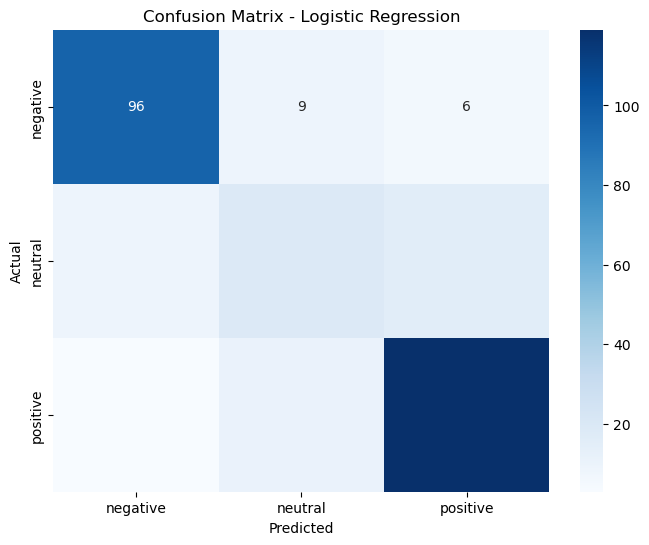

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['body_processed'], df['sentiment'], test_size=0.2, random_state=42)

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=3000)  # You can adjust max_features

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(class_weight='balanced', max_iter=5000) # Increase max_iter if convergence warning occurs
log_reg.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test_tfidf)

# Evaluate the model
print("Logistic Regression Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Optional: Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, X_train_tfidf, y_train, cv=11, scoring='accuracy')
print("CV Accuracy:", scores.mean())

CV Accuracy: 0.7760739260739261



Random Forest Model Performance:
Accuracy: 0.7986111111111112

Classification Report:
               precision    recall  f1-score   support

    negative       0.86      0.87      0.87       111
     neutral       1.00      0.05      0.09        44
    positive       0.76      0.98      0.86       133

    accuracy                           0.80       288
   macro avg       0.87      0.63      0.60       288
weighted avg       0.83      0.80      0.74       288


Confusion Matrix:
 [[ 97   0  14]
 [ 14   2  28]
 [  2   0 131]]


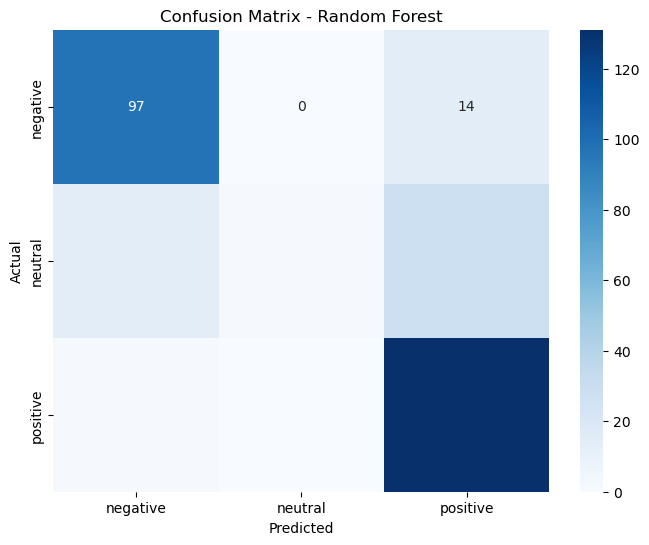

Random Forest CV Accuracy: 0.7786963036963037


In [27]:
from sklearn.ensemble import RandomForestClassifier

#  N-gram vectorization using TF-IDF (unigrams + bigrams)
tfidf = TfidfVectorizer(ngram_range=(1,2), max_df=0.95, min_df=5)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

#  Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_tfidf, y_train)

#  Make predictions on the test data
y_pred_rf = rf_model.predict(X_test_tfidf)

#  Evaluate the Random Forest model
print("\nRandom Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

#  Optional: Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

#  Perform cross-validation on the Random Forest model
scores_rf = cross_val_score(rf_model, X_train_tfidf, y_train, cv=11, scoring='accuracy')
print("Random Forest CV Accuracy:", scores_rf.mean())



Support Vector Machine (SVM) Model Performance:
Accuracy: 0.7986111111111112

Classification Report:
               precision    recall  f1-score   support

    negative       0.87      0.87      0.87       111
     neutral       0.44      0.43      0.44        44
    positive       0.86      0.86      0.86       133

    accuracy                           0.80       288
   macro avg       0.72      0.72      0.72       288
weighted avg       0.80      0.80      0.80       288


Confusion Matrix:
 [[ 97  11   3]
 [  9  19  16]
 [  6  13 114]]


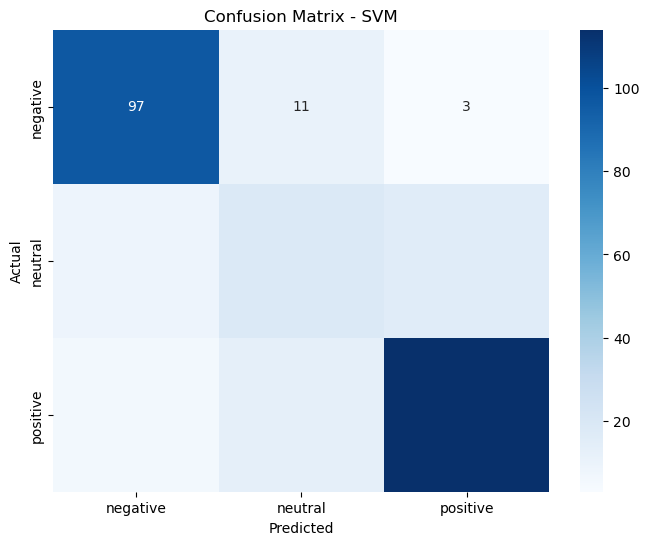

SVM CV Accuracy: 0.7552031302031302


In [28]:
from sklearn.svm import SVC

# Initialize and train the SVM model
# Using a linear kernel is often a good starting point for text data
svm_model = SVC(kernel='linear', random_state=42, class_weight='balanced')
svm_model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate the SVM model
print("\nSupport Vector Machine (SVM) Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Optional: Plot confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues',
            xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

# Perform cross-validation on the SVM model
scores_svm = cross_val_score(svm_model, X_train_tfidf, y_train, cv=11, scoring='accuracy')
print("SVM CV Accuracy:", scores_svm.mean())


VADER Sentiment Distribution:
positive    916
negative    485
neutral      39
Name: vader_sentiment, dtype: int64

Comparison of Defined Sentiment and VADER Sentiment:
vader_sentiment  negative  neutral  positive
sentiment                                   
negative              371       18       123
neutral                77       12       110
positive               37        9       683

Accuracy of VADER vs Defined Sentiment: 0.7403


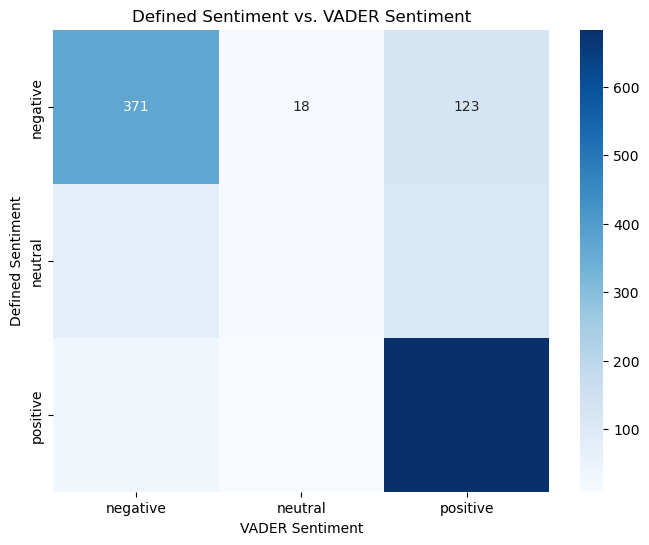

In [29]:
!pip install vaderSentiment -q
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# VADER Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()

def vader_sentiment_scores(text):
    if isinstance(text, str):
        return analyzer.polarity_scores(text)
    return {}

def classify_vader_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'
analyzer.lexicon.update({'meh': 0.0, 'fine': 0.0, 'decent': 0.0})

df['vader_scores'] = df['body_processed'].apply(vader_sentiment_scores)
df['vader_compound'] = df['vader_scores'].apply(lambda x: x['compound'])
df['vader_sentiment'] = df['vader_compound'].apply(classify_vader_sentiment)

# VADER Evaluation
print("\nVADER Sentiment Distribution:")
print(df['vader_sentiment'].value_counts())

vader_comparison = pd.crosstab(df['sentiment'], df['vader_sentiment'])
print("\nComparison of Defined Sentiment and VADER Sentiment:")
print(vader_comparison)

vader_accuracy = accuracy_score(df['sentiment'], df['vader_sentiment'])
print(f"\nAccuracy of VADER vs Defined Sentiment: {vader_accuracy:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(vader_comparison, annot=True, fmt='d', cmap='Blues')
plt.title('Defined Sentiment vs. VADER Sentiment')
plt.xlabel('VADER Sentiment')
plt.ylabel('Defined Sentiment')
plt.show()

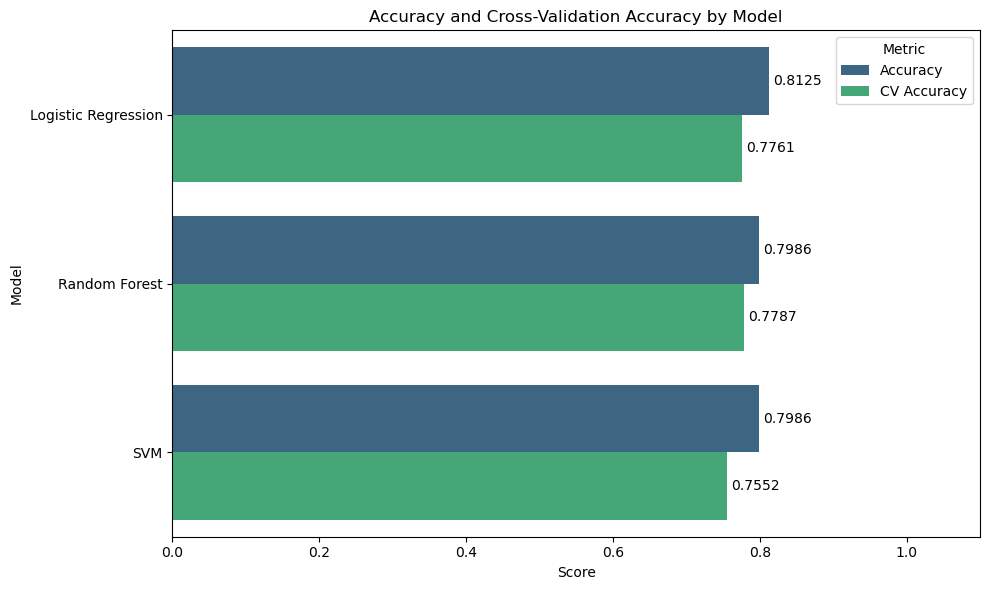

In [30]:
# Collect accuracy and CV accuracy for the models
model_names = ['Logistic Regression', 'Random Forest', 'SVM']
accuracy_scores = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svm)]
cv_accuracy_scores = [scores.mean(), scores_rf.mean(), scores_svm.mean()]

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Metric': ['Accuracy'] * len(model_names) + ['CV Accuracy'] * len(model_names),
    'Model': model_names * 2,
    'Score': accuracy_scores + cv_accuracy_scores
})

# Plotting
plt.figure(figsize=(10, 6))
barplot = sns.barplot(y='Model', x='Score', hue='Metric', data=plot_data, palette='viridis')
plt.xlabel('Score')
plt.ylabel('Model')
plt.title('Accuracy and Cross-Validation Accuracy by Model')
plt.xlim(0, 1.1) # Set x-axis limit to be slightly above 1

# Add values to the bars
for container in barplot.containers:
    plt.bar_label(container, fmt='%.4f', padding=3)

plt.legend(title='Metric')
plt.tight_layout()
plt.show()

In [31]:
import joblib

# Save the trained Logistic Regression model
joblib.dump(log_reg, 'logistic_regression_model.pkl')

# Save the fitted TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

print("Logistic Regression model and TF-IDF vectorizer saved.")

Logistic Regression model and TF-IDF vectorizer saved.
